In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('E:/Projects/mlproject/notebook/data/StudentsPerformance.csv')

In [16]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
df.shape

(1000, 8)

In [18]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [20]:
df.duplicated().sum()


0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [22]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [23]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [29]:
print("categories in 'gender' variable:     ",end=" ")
print(df['gender'].unique())

print("categories in 'race/ethnicity' variable:    ",end=" ")
print(df['race/ethnicity'].unique())

print("categories in 'parental level of education' variable:    ",end=" ")
print(df['parental level of education'].unique())

print("categories in 'lunch' variable:    ",end=" ")
print(df['lunch'].unique())

print("categories in 'test preparation course ' variable:    ",end=" ")
print(df['test preparation course'].unique())

categories in 'gender' variable:      ['female' 'male']
categories in 'race/ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:     ['standard' 'free/reduced']
categories in 'test preparation course ' variable:     ['none' 'completed']


In [34]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [39]:
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'object'] 
categorical_features=[feature for feature in df.columns if df[feature].dtype =='object']

print('we have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print('we have {} categorical features: {}'.format(len(categorical_features),categorical_features))

we have 3 numerical features: ['math score', 'reading score', 'writing score']
we have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [41]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [42]:
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [43]:
reading_full=df[df['reading score'] == 100]['average'].count()
writing_full=df[df['writing score'] == 100]['average'].count()
math_full=df[df['math score'] == 100]['average'].count()

print(f'No.of students with full marks in reading: {reading_full}')
print(f'No.of students with full marks in writing: {writing_full}')
print(f'No.of students with full marks in maths: {math_full}')

No.of students with full marks in reading: 17
No.of students with full marks in writing: 14
No.of students with full marks in maths: 7


In [46]:
reading_less=df[df['reading score'] <= 20]['average'].count()
writing_less=df[df['writing score'] <= 20]['average'].count()
math_less=df[df['math score'] <= 20]['average'].count()

print(f'No.of students with least marks in reading: {reading_less}')
print(f'No.of students with least marks in writing: {writing_less}')
print(f'No.of students with least marks in maths: {math_less}')

No.of students with least marks in reading: 1
No.of students with least marks in writing: 3
No.of students with least marks in maths: 4


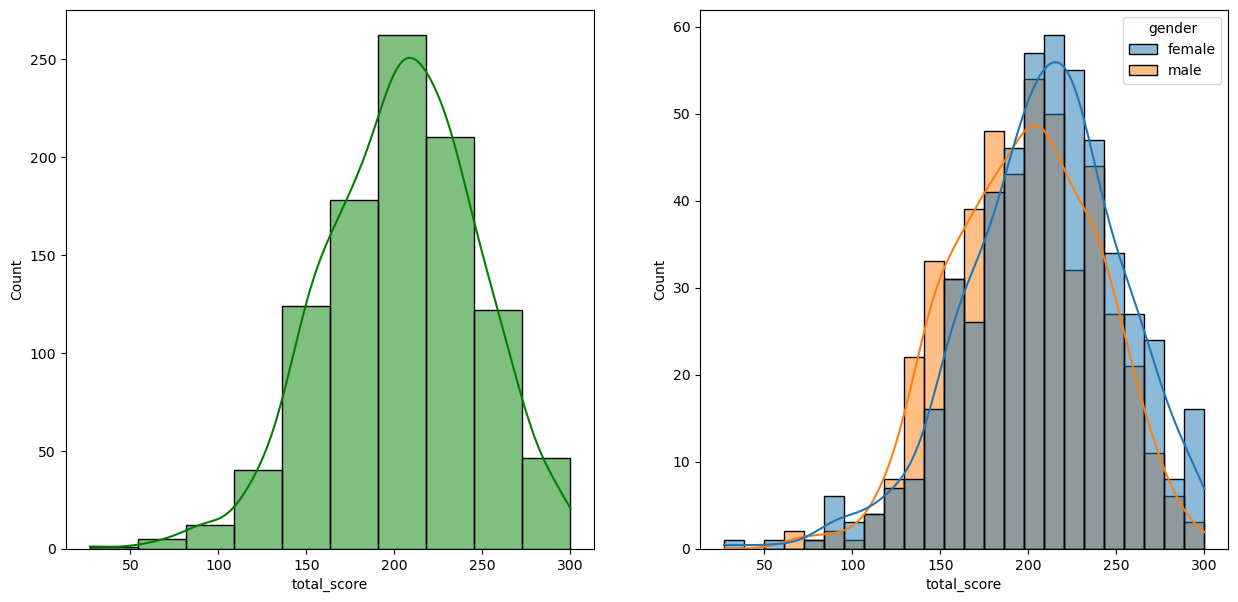

In [49]:
plt.subplots(1,2, figsize =(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=10,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

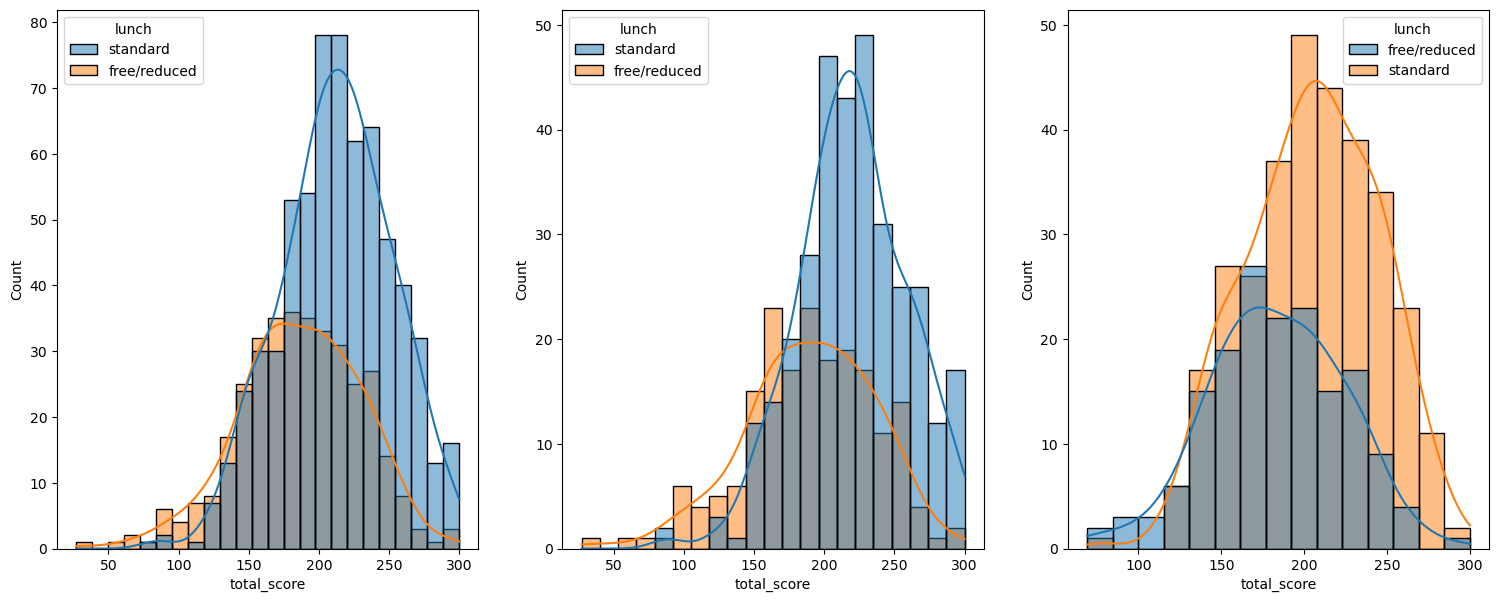

In [51]:
plt.subplots(1,2, figsize =(25,7))
plt.subplot(141)
sns.histplot(data=df,x='total_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='total_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='total_score',kde=True,hue='lunch')
plt.show()

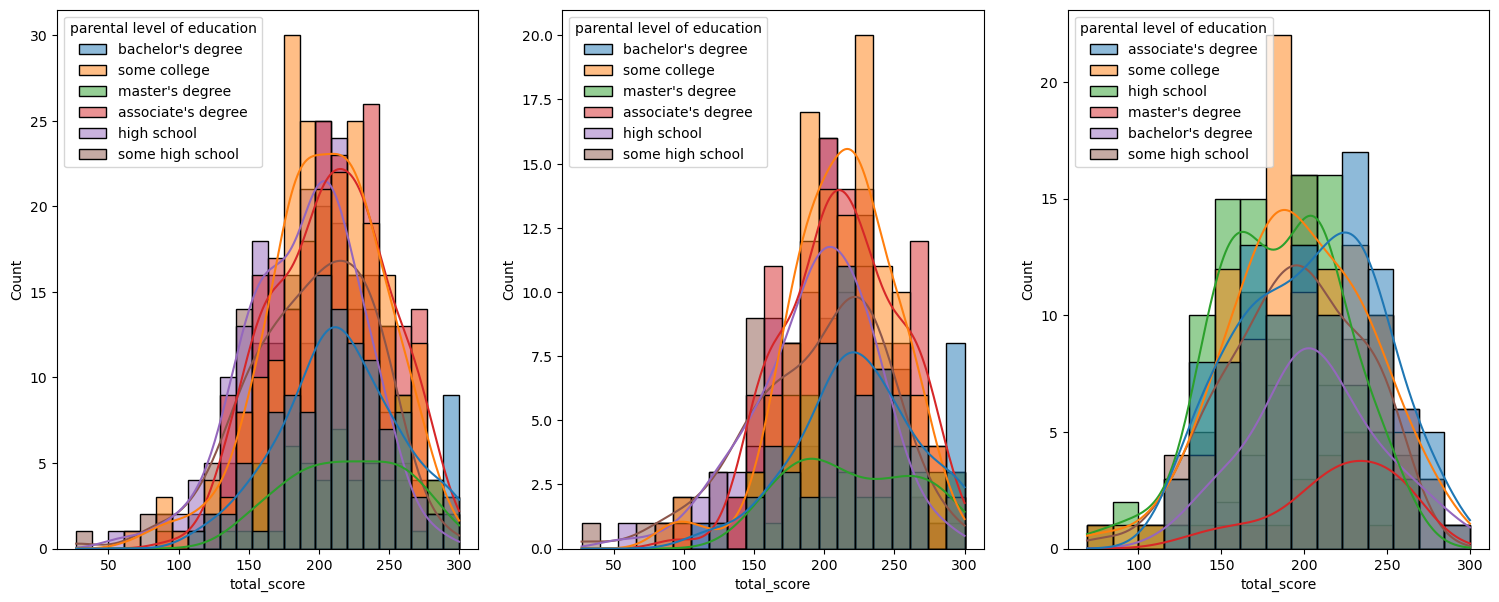

In [53]:
plt.subplots(1,2, figsize =(25,7))
plt.subplot(141)
sns.histplot(data=df,x='total_score',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='total_score',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='total_score',kde=True,hue='parental level of education')
plt.show()

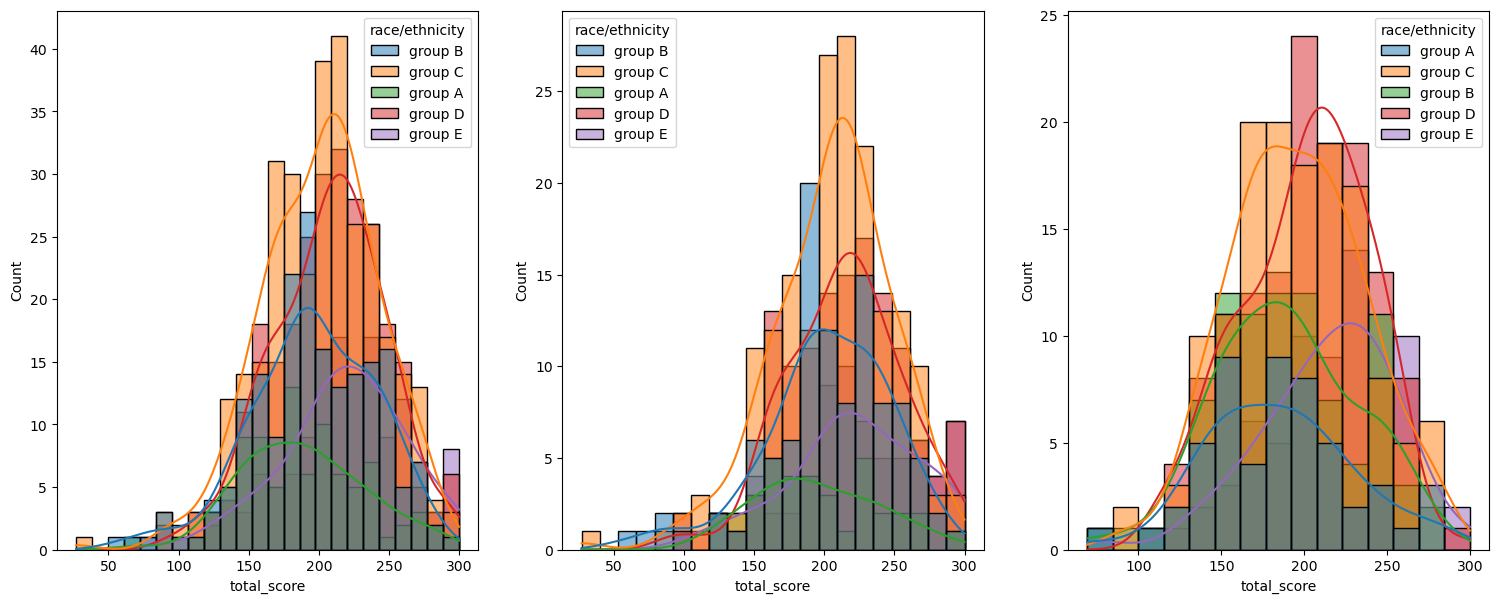

In [55]:
plt.subplots(1,2, figsize =(25,7))
plt.subplot(141)
sns.histplot(data=df,x='total_score',kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='total_score',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='total_score',kde=True,hue='race/ethnicity')
plt.show()

<Axes: title={'center': 'Writing scores'}, ylabel='writing score'>

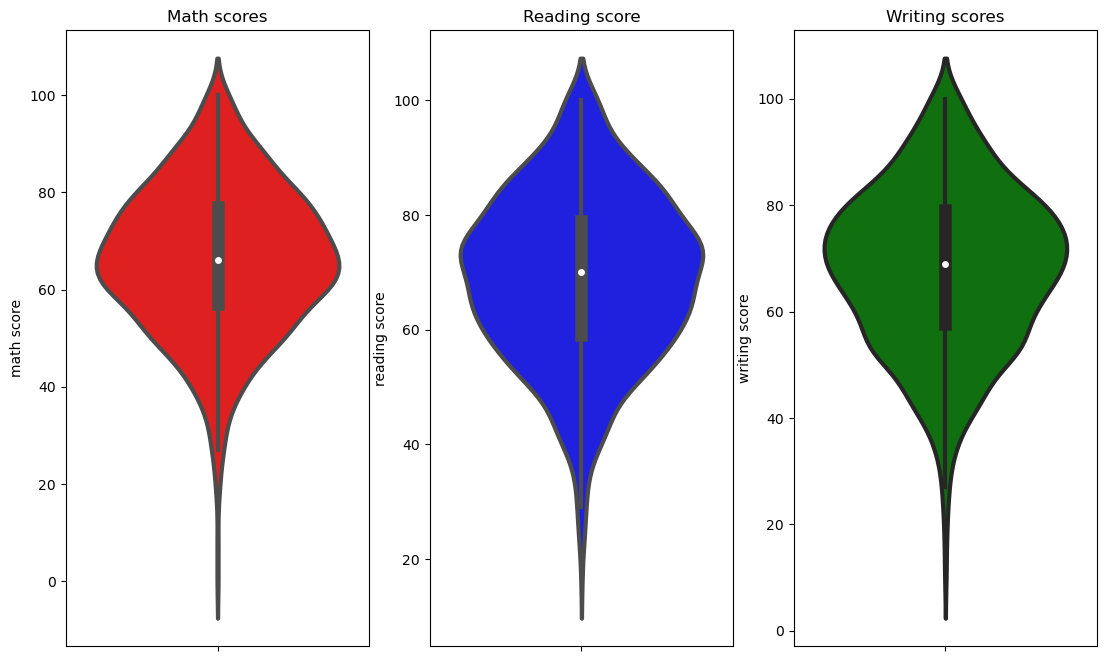

In [58]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math scores')
sns.violinplot(y='math score',data=df,color='r',linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading score')
sns.violinplot(y='reading score',data=df,color='b',linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing scores')
sns.violinplot(y='writing score',data=df,color='g',linewidth=3)